# **Data Processing and Cleaning**

## 1. **Data Loading and Initial Inspection**


Before cleaning and processing, we load the dataset and inspect its structure, including column names, data types, and summary statistics.

# Load the dataset

In [164]:
import pandas as pd
df = pd.read_csv("primary_data.csv")

# Display the first 5 rows

In [165]:
df.head()

,Video ID,Title,Duration,Views,Likes,Comments,Language,Topic,Publication Time,Region
0,KbiwL74KyJQ,Shrek 5 Cast Announcement,PT28S,7871600,156303,0,English,Entertainment,2025-02-27T16:01:18Z,US
1,8B1EtVPBSMw,A Minecraft Movie | Final Trailer,PT2M31S,11843815,239419,22975,English,Film & Animation,2025-02-27T20:00:04Z,US
2,W7FTkUFU7nw,Pokémon Presents | 2.27.2025,PT19M16S,3599910,156222,18513,English,Gaming,2025-02-27T14:00:06Z,US
3,r5VRqWkFpEQ,LISA - FUTW (Vixi Solo Version) (Official Musi...,PT3M48S,8218102,1016119,66437,English,Music,2025-02-28T05:01:26Z,US
4,vONxgCQWZCA,YoungBoy Never Broke Again - 5 Night [Official...,PT3M16S,540591,60888,5892,English,Music,2025-02-28T06:32:53Z,US


# Number of rows and columns

In [166]:
num_rows, num_cols = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 2513
Number of columns: 10


# Prints the data types of each column

In [167]:
column_types = df.dtypes

print("Types of columns:")
print(column_types)

Types of columns:
Video ID            object
Title               object
Duration            object
Views                int64
Likes                int64
Comments             int64
Language            object
Topic               object
Publication Time    object
Region              object
dtype: object


# Summary statistics for numerical columns  

In [168]:
df.describe()

,Views,Likes,Comments
count,2.513000e+03,2.513000e+03,2513.000000
mean,2.578657e+06,9.285591e+04,5555.045762
std,8.352468e+06,3.028678e+05,15382.891750
min,0.000000e+00,0.000000e+00,0.000000
25%,3.243060e+05,9.028000e+03,533.000000
50%,7.442750e+05,2.301400e+04,1477.000000
75%,1.819733e+06,6.751600e+04,3986.000000
max,1.465875e+08,4.580506e+06,173803.000000


## 2. **Handling Missing Values**

We check for missing values in the dataset and handle them appropriately. For this dataset, we drop rows with missing critical fields like `Views`, `Likes`, or `Comments`

# Check for missing values

In [169]:
df.isnull().sum()

Video ID            0
Title               0
Duration            0
Views               0
Likes               0
Comments            0
Language            0
Topic               0
Publication Time    0
Region              0
dtype: int64

**No missing values found**, so no rows were dropped.

## 3. **Removing Duplicates**

### Description:
We check for duplicate rows based on the `VideoID` column and remove them to ensure data integrity.

# Check for duplicate Video IDs

In [170]:


# Count occurrences of each Video ID
video_id_counts = df['Video ID'].value_counts()

# Display basic statistics
print(f"Total rows: {len(df)}")
print(f"Unique Video IDs: {df['Video ID'].nunique()}")
print(f"Duplicated Video IDs: {(df.duplicated(subset='Video ID').sum())}")

# Create a DataFrame from the value counts
video_id_freq_df = video_id_counts.reset_index()
video_id_freq_df.columns = ['Video ID', 'Frequency']

# Show top 10 most frequent Video IDs
print("\nTop 10 most repeated Video IDs:")
video_id_freq_df.head(10)



Total rows: 2513
Unique Video IDs: 1857
Duplicated Video IDs: 656

Top 10 most repeated Video IDs:


,Video ID,Frequency
0,r5VRqWkFpEQ,11
1,mFuyX1XgJFg,9
2,KbiwL74KyJQ,8
3,SD2UiX1jpd8,8
4,eWAdpUyzCkI,8
5,8B1EtVPBSMw,8
6,I8I51kSq448,7
7,kxUA2wwYiME,7
8,3xQ80DOkN1A,7
9,H0y5RwcCJ0Q,7


In [171]:
# Remove duplicate rows based on 'Video ID', keep the first occurrence
df_deduplicated = df.drop_duplicates(subset='Video ID', keep='first').copy()

# Check shape after deduplication
print("Original shape:", df.shape)
print("New shape after removing duplicates:", df_deduplicated.shape)


Original shape: (2513, 10)
New shape after removing duplicates: (1857, 10)


**Duplicated Video IDs: 656 rows** were removed

## 4. **Data Type Conversion**
### Description:
We convert the **Duration** column from ISO 8601 format to seconds for easier analysis. We also convert the **Publication Time** column to a datetime object.

In [172]:
import numpy as np

# Function to convert ISO 8601 duration to seconds
def duration_to_seconds(duration):
    import re
    pattern = re.compile(r'PT(\d+H)?(\d+M)?(\d+S)?')
    matches = pattern.match(duration)

    hours = int(matches.group(1)[:-1]) if matches.group(1) else 0
    minutes = int(matches.group(2)[:-1]) if matches.group(2) else 0
    seconds = int(matches.group(3)[:-1]) if matches.group(3) else 0

    return hours * 3600 + minutes * 60 + seconds

# Convert Duration column to seconds
df_deduplicated["Duration"] = df_deduplicated["Duration"].apply(duration_to_seconds)

# Convert Publication Time to datetime
df_deduplicated["Publication Time"] = pd.to_datetime(df_deduplicated["Publication Time"])
df_deduplicated.head()

,Video ID,Title,Duration,Views,Likes,Comments,Language,Topic,Publication Time,Region
0,KbiwL74KyJQ,Shrek 5 Cast Announcement,28,7871600,156303,0,English,Entertainment,2025-02-27 16:01:18+00:00,US
1,8B1EtVPBSMw,A Minecraft Movie | Final Trailer,151,11843815,239419,22975,English,Film & Animation,2025-02-27 20:00:04+00:00,US
2,W7FTkUFU7nw,Pokémon Presents | 2.27.2025,1156,3599910,156222,18513,English,Gaming,2025-02-27 14:00:06+00:00,US
3,r5VRqWkFpEQ,LISA - FUTW (Vixi Solo Version) (Official Musi...,228,8218102,1016119,66437,English,Music,2025-02-28 05:01:26+00:00,US
4,vONxgCQWZCA,YoungBoy Never Broke Again - 5 Night [Official...,196,540591,60888,5892,English,Music,2025-02-28 06:32:53+00:00,US


Apply Min-Max Normalization to Views, Likes, and Comments

# Check if ther are rows where Likes > Views 

In [173]:
# Count rows where Likes > Views (invalid)
invalid_likes = df_deduplicated[df_deduplicated['Likes'] > df_deduplicated['Views']]
print(f"Rows where Likes > Views: {len(invalid_likes)}")

# Display some examples
if not invalid_likes.empty:
    print("Examples of invalid rows:")
    print(invalid_likes.head())
# Remove rows where 'Likes' > 'Views' (impossible scenario)
df_deduplicated = df_deduplicated[df_deduplicated['Likes'] <= df_deduplicated['Views']]

# Keep rows where 'Comments' > 'Views' (valid scenario)
print(f"Dataset size after cleaning: {df_deduplicated.shape}")


Rows where Likes > Views: 1
Examples of invalid rows:
         Video ID                                              Title  \
1316  Mw1r6DwYy-g  All 20 Drivers. All 10 Teams. UNVEILED. | F1 7...   

      Duration  Views   Likes  Comments Language   Topic  \
1316      7439      0  240037      4034   French  Sports   

              Publication Time Region  
1316 2025-02-18 22:14:25+00:00     FR  
Dataset size after cleaning: (1856, 10)


## 5. **Detect Outliers**

Outliers in Duration:
90       3491
118      8941
234     15834
406      4635
421     42894
        ...  
2271     5530
2291     4766
2306    17615
2310     3357
2363     4032
Name: Duration, Length: 87, dtype: int64 

Outliers in Views:
0        7871600
1       11843815
2        3599910
3        8218102
8       31166959
          ...   
2500     3332825
2501     4038782
2506     4433391
2507    63903398
2510    20177055
Name: Views, Length: 190, dtype: int64 

Outliers in Likes:
0        156303
1        239419
2        156222
3       1016119
8        792502
         ...   
2495     324384
2500     116070
2503     268783
2507    2282893
2510     394374
Name: Likes, Length: 223, dtype: int64 

Outliers in Comments:
1        22975
2        18513
3        66437
8        48500
11        7913
         ...  
2495     20501
2500      8048
2503     10262
2504      9611
2507    144840
Name: Comments, Length: 198, dtype: int64 



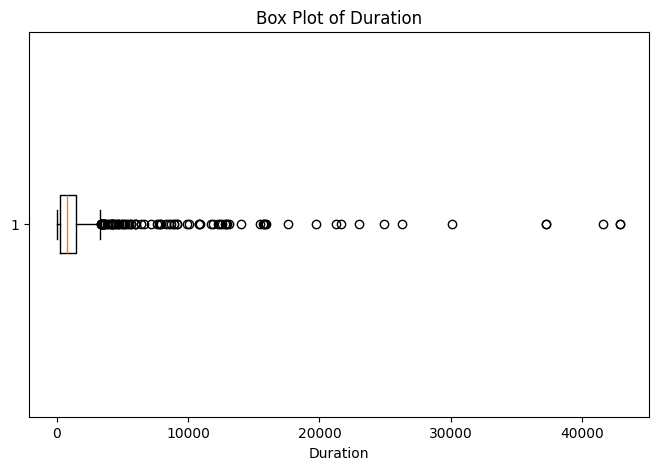

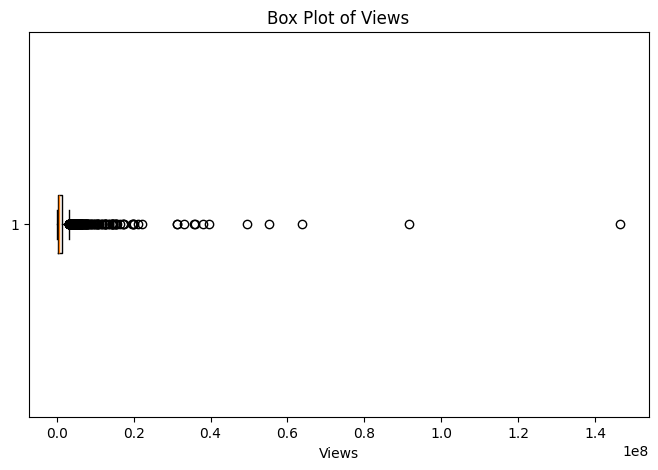

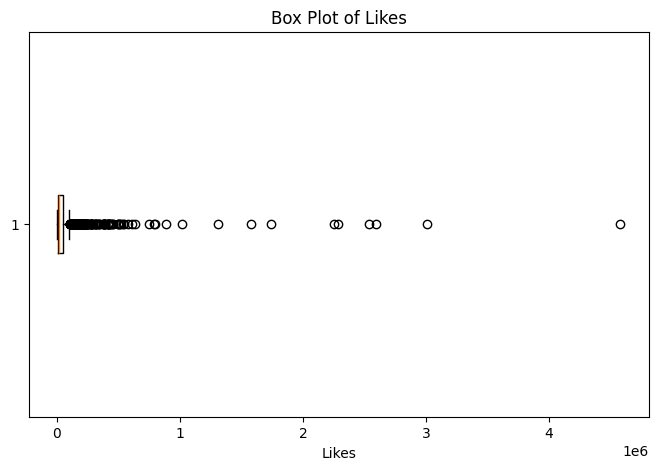

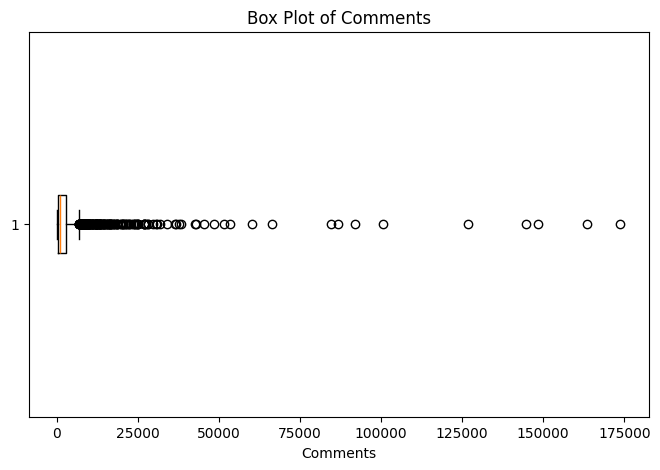

In [174]:
import matplotlib.pyplot as plt
# Function to detect outliers using IQR
def detect_outliers_iqr(df_deduplicated):
    outliers = {}
    for column in df_deduplicated.select_dtypes(include=[np.number]).columns:  # Select only numerical columns
        Q1 = df_deduplicated[column].quantile(0.25)
        Q3 = df_deduplicated[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df_deduplicated[(df_deduplicated[column] < lower_bound) | (df_deduplicated[column] > upper_bound)][column]
    return outliers

# Detect outliers
outliers_dict = detect_outliers_iqr(df_deduplicated)

# Print outliers
for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:")
    print(outliers, "\n")

# Box plot for numerical columns
for column in df_deduplicated.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df_deduplicated[column].dropna(), vert=False)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In our analysis, we have identified outliers in the dataset, particularly in metrics related to video performance. However, rather than removing these outliers, we have chosen to **retain them**. The primary reason for this decision is that we are specifically interested in understanding videos that achieve a large number of views. These high-performing videos often appear as outliers, but they provide valuable insights into trends, audience preferences, and factors contributing to viral success. By keeping these data points, we ensure that our analysis accurately reflects the dynamics of highly successful content, allowing us to uncover meaningful patterns that might otherwise be lost.

## 6. **Normalizing**

# Normalizing Views, Comments and Likes

In [175]:
# Apply Min-Max Normalization to Views, Likes, and Comments
columns_to_normalize = ["Views", "Likes", "Comments"]
for col in columns_to_normalize:
    min_val = df_deduplicated[col].min()
    max_val = df_deduplicated[col].max()
    df_deduplicated[col] = (df_deduplicated[col] - min_val) / (max_val - min_val)

df_deduplicated.head()

,Video ID,Title,Duration,Views,Likes,Comments,Language,Topic,Publication Time,Region
0,KbiwL74KyJQ,Shrek 5 Cast Announcement,28,0.053542,0.034124,0.000000,English,Entertainment,2025-02-27 16:01:18+00:00,US
1,8B1EtVPBSMw,A Minecraft Movie | Final Trailer,151,0.080644,0.052269,0.132191,English,Film & Animation,2025-02-27 20:00:04+00:00,US
2,W7FTkUFU7nw,Pokémon Presents | 2.27.2025,1156,0.024396,0.034106,0.106518,English,Gaming,2025-02-27 14:00:06+00:00,US
3,r5VRqWkFpEQ,LISA - FUTW (Vixi Solo Version) (Official Musi...,228,0.055906,0.221837,0.382257,English,Music,2025-02-28 05:01:26+00:00,US
4,vONxgCQWZCA,YoungBoy Never Broke Again - 5 Night [Official...,196,0.003523,0.013293,0.033901,English,Music,2025-02-28 06:32:53+00:00,US


# One-hot encode 'Topic' and 'Language' columns

During data cleaning, we removed any rows where the number of likes exceeded the number of views, as this is not logically possible since a user must view content before liking it. However, we retained rows where the number of comments was greater than the number of views, as a single user can leave multiple comments on the same content. This ensures the dataset remains realistic and reliable for further analysis.

In [176]:
# One-hot encode 'Topic' and 'Language' columns
if 'Topic' in df_deduplicated.columns and 'Language' in df_deduplicated.columns:
    df_deduplicated = pd.get_dummies(df_deduplicated, columns=['Topic', 'Language'], drop_first=False)

    # Convert only the "Topic" and "Language" columns from boolean to integers (0 and 1)
    topic_language_columns = [col for col in df_deduplicated.columns if 'Topic' in col or 'Language' in col]
    df_deduplicated[topic_language_columns] = df_deduplicated[topic_language_columns].astype(int)  # More efficient than applymap()

    # Display first few rows after encoding
    print("After One-Hot Encoding and Normalization:")
df_deduplicated.head()


After One-Hot Encoding and Normalization:


,Video ID,Title,Duration,Views,Likes,Comments,Publication Time,Region,Topic_Autos & Vehicles,Topic_Comedy,...,Language_Arabic,Language_English,Language_French,Language_German,Language_Hindi,Language_Japanese,Language_Korean,Language_Portuguese,Language_Russian,Language_Spanish
0,KbiwL74KyJQ,Shrek 5 Cast Announcement,28,0.053542,0.034124,0.000000,2025-02-27 16:01:18+00:00,US,0,0,...,0,1,0,0,0,0,0,0,0,0
1,8B1EtVPBSMw,A Minecraft Movie | Final Trailer,151,0.080644,0.052269,0.132191,2025-02-27 20:00:04+00:00,US,0,0,...,0,1,0,0,0,0,0,0,0,0
2,W7FTkUFU7nw,Pokémon Presents | 2.27.2025,1156,0.024396,0.034106,0.106518,2025-02-27 14:00:06+00:00,US,0,0,...,0,1,0,0,0,0,0,0,0,0
3,r5VRqWkFpEQ,LISA - FUTW (Vixi Solo Version) (Official Musi...,228,0.055906,0.221837,0.382257,2025-02-28 05:01:26+00:00,US,0,0,...,0,1,0,0,0,0,0,0,0,0
4,vONxgCQWZCA,YoungBoy Never Broke Again - 5 Night [Official...,196,0.003523,0.013293,0.033901,2025-02-28 06:32:53+00:00,US,0,0,...,0,1,0,0,0,0,0,0,0,0


In [177]:
# Save the processed dataset as a CSV file
df_deduplicated.to_csv("processed_data.csv", index=False, encoding='utf-8-sig')

# Confirm the file has been saved
print("Processed data saved as 'processed_data.csv'")

Processed data saved as 'processed_data.csv'
